<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib
!pip install numpy

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [6]:
## Write your code here
booleandf = df.duplicated()
num_duplicates = df.duplicated().sum()
print(len(booleandf))
print(num_duplicates)

65437
0


### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [7]:
## Write your code here
sum_missingV = df['CodingActivities'].isnull().sum()
sum_missingV

np.int64(10971)

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [8]:
## Write your code here
df['CodingActivities'] = df['CodingActivities'].ffill()
VCCodingActivities = df['CodingActivities'].isnull().value_counts()
print(VCCodingActivities)

CodingActivities
False    65437
Name: count, dtype: int64


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [11]:
## Write your code here
VCConvertedCompYearly = df['ConvertedCompYearly'].isnull().value_counts()
print(VCConvertedCompYearly)

ConvertedCompYearlyMean = df['ConvertedCompYearly'].mean()
print(ConvertedCompYearlyMean)

df['ConvertedCompYearly'].replace(np.nan, ConvertedCompYearlyMean , inplace = True)
df['ConvertedCompYearly'].value_counts()


ConvertedCompYearly
True     42002
False    23435
Name: count, dtype: int64
86155.28726264134


/tmp/ipykernel_4184/2542597845.py:8: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['ConvertedCompYearly'].replace(np.nan, ConvertedCompYearlyMean , inplace = True)


ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
152615.0      1
4364.0        1
15637.0       1
9711.0        1
116844.0      1
Name: count, Length: 6113, dtype: int64

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [13]:
## Write your code here
df['ConvertedCompYearly_Normalized'] = (df['ConvertedCompYearly']- df['ConvertedCompYearly'].min())/(df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())

df['ConvertedCompYearly_Normalized'].value_counts()

ConvertedCompYearly_Normalized
0.003964    321
0.003303    308
0.004625    230
0.005285    226
0.006607    208
           ... 
0.009388      1
0.000268      1
0.000962      1
0.000597      1
0.007187      1
Name: count, Length: 6113, dtype: int64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [20]:
## Write your code here
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean())/df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'].value_counts()

ConvertedCompYearly_Zscore
-0.116254    321
-0.173767    308
-0.058746    230
-0.001233    226
 0.113788    208
            ... 
 0.355862      1
-0.437956      1
-0.377594      1
-0.409325      1
 0.164324      1
Name: count, Length: 6113, dtype: int64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


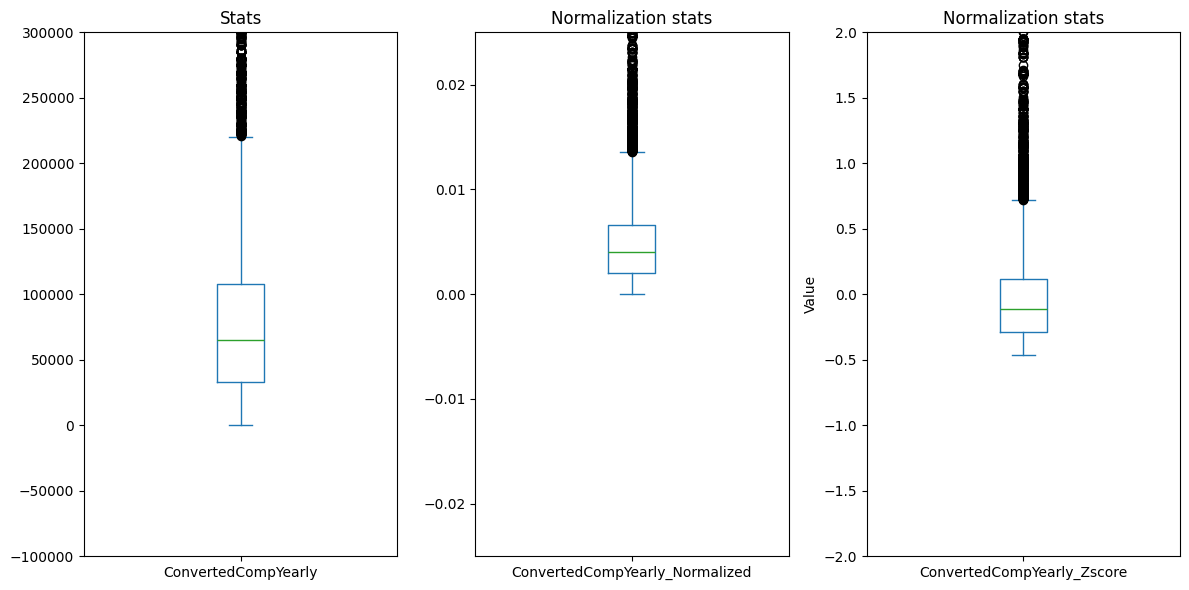

In [36]:
## Write your code here

fig = plt.figure(figsize = (12,6))
px11 = fig.add_subplot(1,3,1) #location of graph, where there is 1 row, 3 columns, and first plot.
px12 =fig.add_subplot(1,3,2) #location of graph, where there is 1 row, 3 columns, and Second plot.
px13 =fig.add_subplot(1,3,3) #location of graph, where there is 1 row, 3 columns, and third plot.

df[['ConvertedCompYearly']].plot.box(title='Stats', ax = px11)
px11.set_ylim(-0.1e+06, 0.3e+06)#Function to declare plot's range in y axis

df[['ConvertedCompYearly_Normalized']].plot.box(title='Normalization stats', ax = px12)
px12.set_ylim(-0.025, 0.025)

df[['ConvertedCompYearly_Zscore']].plot.box(title='Normalization stats', ax = px13)
px13.set_ylim(-2, 2)

plt.ylabel('Value')
plt.tight_layout()

plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
